# Introduction
Name | Abid Ilmun Fisabil <br>
Batch | FTDS-006 <br>
Phase | 1

# Objective
to create a model that can classify **next-day rain** based on today or current day whether features using Logistic Regression and Support Vector Machine

# Importing Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts, GridSearchCV,RandomizedSearchCV,PredefinedSplit
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Loading

In [2]:
#reading data
df = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')

# Initial Inspection

In [3]:
#inspecting first 5 rows of the data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#getting basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
#getting data shape
df.shape

(145460, 23)

In [6]:
#getting null values percentage
round(df.isnull().sum()[df.isnull().sum() > 0]/len(df)*100)

MinTemp           1.0
MaxTemp           1.0
Rainfall          2.0
Evaporation      43.0
Sunshine         48.0
WindGustDir       7.0
WindGustSpeed     7.0
WindDir9am        7.0
WindDir3pm        3.0
WindSpeed9am      1.0
WindSpeed3pm      2.0
Humidity9am       2.0
Humidity3pm       3.0
Pressure9am      10.0
Pressure3pm      10.0
Cloud9am         38.0
Cloud3pm         41.0
Temp9am           1.0
Temp3pm           2.0
RainToday         2.0
RainTomorrow      2.0
dtype: float64

In [7]:
#getting counts of features containing null values
len(df.isnull().sum()[df.isnull().sum() > 0]/len(df)*100)

21

In [8]:
#dropping all null values and compare it to the original state
print('dataset after dropping all nulls: ',len(df.dropna()),'\ndataset before dropping all nulls:',len(df))
print('null to original percentage: ',round((len(df)-len(df.dropna()))/len(df)*100),'%')

dataset after dropping all nulls:  56420 
dataset before dropping all nulls: 145460
null to original percentage:  61 %


In [9]:
#checking categorical features
for i in df[df.dtypes[df.dtypes==object].index]:
    print(i,'\n',df[i].unique(),'\n')

Date 
 ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31'] 

Location 
 ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 

WindGustDir 
 ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW'] 

WindDir9am 
 ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE'] 

WindDir3pm 
 ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan '

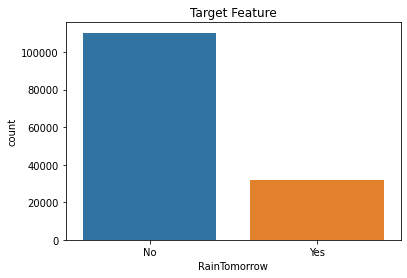

In [10]:
sns.countplot(df.RainTomorrow)
plt.title('Target Feature');

#### **Initial Findings**
- dataset is a 23 dimentional data with 145,460 observations
- null values in 21 features. some in a quite big proportion such as 48% from Sunshine and 41% from Cloud3pm
- no null data is only around 39% from the original
- date feature is not in datetime data type
- target feature is quite imbalanced

# Exploration

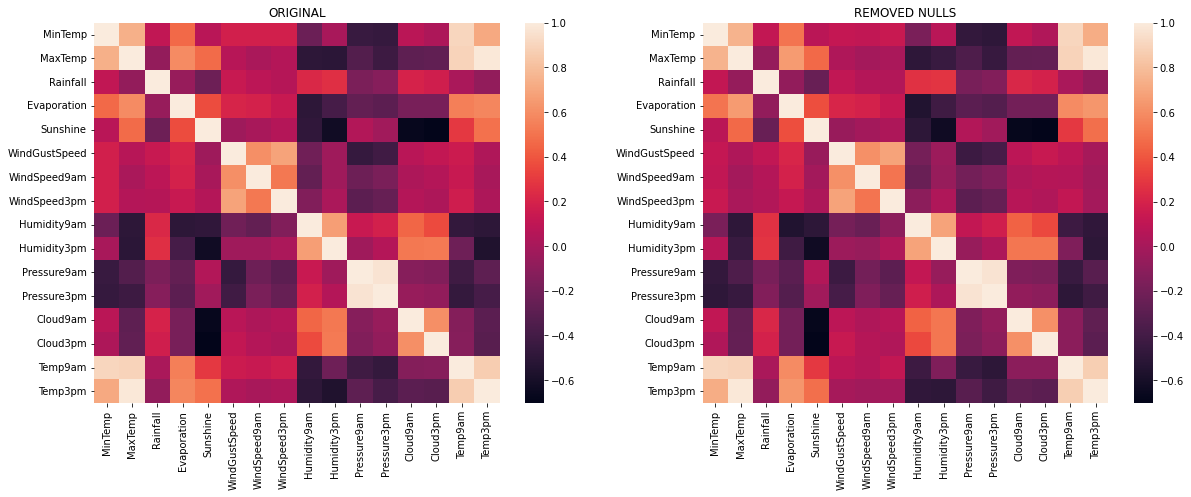

In [11]:
#creating correlation heatmap comparison
fig, ax = plt.subplots(1,2,figsize = (20,7))
sns.heatmap(df.corr(), ax = ax[0])
sns.heatmap(df.dropna().corr(), ax = ax[1])
ax[0].set_title('ORIGINAL')
ax[1].set_title('REMOVED NULLS')
plt.show();

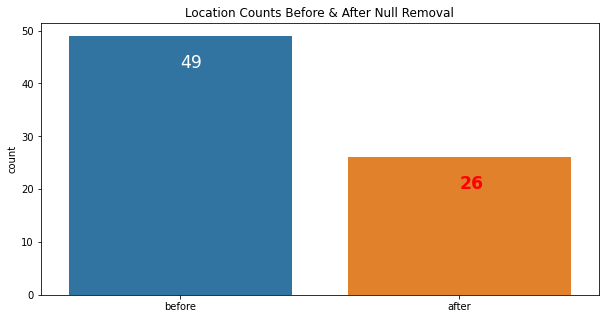

In [12]:
#Null Removal Effect on Location Feature
locs = [df.dropna().Location.nunique(),df.Location.nunique()]
seq = ['before']*locs[1]+['after']*locs[0]
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(seq)
ax.text(x = 1, y = locs[0]-6,s = '26',fontdict = {'fontsize':'xx-large','c':'red','fontweight':'bold'})
ax.text(x = 0, y = locs[1]-6,s = '49',fontdict = {'fontsize':'xx-large','c':'white'})
ax.set_title('Location Counts Before & After Null Removal')
plt.show();

In [13]:
#categorical before and after null removal
for i in df.dtypes[df.dtypes == object].index:
    print(i,'\n',len(df[i].unique()),'\n',len(df.dropna()[i].unique()),'\n')

Date 
 3436 
 3416 

Location 
 49 
 26 

WindGustDir 
 17 
 16 

WindDir9am 
 17 
 16 

WindDir3pm 
 17 
 16 

RainToday 
 3 
 2 

RainTomorrow 
 3 
 2 



#### **Explanation**
**missing values**<br>
this exploration is intended to understand whether it is safe to remove all missing values that makes up 61% of the data.<br>
looking at the percentage itself, it is too much data to be removed. however, if we impute the missing values based on data distribution, thats going to be too much for impostor data as well. <br>
so for this data, i have decided to use two approaches for handling the missing values as follows:
>1. drop all missing values and leave only 38% for analysis
>2. drop all columns containing nulls more than 10% and impute the rest based on data distribution

*NOTE*: <br>from the heatmap comparison, i think it is okay to use 38% of the data for the model. from a brief look, the color doesnt differ that much. they are seen very similar. even if theres difference. it's very slight and insignificant. and even if we only take small part from the data (38%), we are still going to have more than 50k observations. so i think we can use the 38% of the data and consider it as a representation from the original data. 

**categorical features**<br>
the next question is whether removing the missing values will decrease the classes from any categorical features present in the dataset.<br>
this is going to be a problem if, for instance, there is a gender feature containing female and male then removing nulls unfortunately also removing all male observations. that means all the analysis thats going to be produced can only extract insights from female observations. thats obviously not what we want when creating a predictive model <br><br>
from the exploration, we can see that removing null values also removes some location. so if this particular feature to be cleaned, it's unfortunately cannot be used. that is because the model will be restricted only to the classes that it was been trained with.  it is a different case, for example, WindGustDir feature. this column had 17 classes before removal and 16 after removal. that means the only class thats been completely removed is only the 'nan' class. based on the reasonings, i have concluded as follows.
>1. Location feature will be removed
>2. the rest of categoricals will not be removed as removal doesn't distrupt their classes

# Data Preprocessing

## Handling Null Values

In [14]:
#getting all column with more than 10% missing values
missing = round(df.isnull().sum()[df.isnull().sum() > 0]/len(df)*100)

#drop column with more than 10% nulls
df_removed_not_all = df.drop(missing[missing>10].index,axis = 1)

#drop the rest nulls
df_removed_not_all = df_removed_not_all.dropna()

#drop Date and Location columns
df_removed_not_all = df_removed_not_all.drop(['Date','Location'],axis = 1)

#drop all nulls from original dataset
df_removed_all = df.dropna()

#drop Date and Location
df_removed_all = df_removed_all.drop(['Date','Location'],axis = 1)

In [15]:
df_removed_all.shape

(56420, 21)

In [16]:
df_removed_not_all.shape

(112925, 17)

# EDA

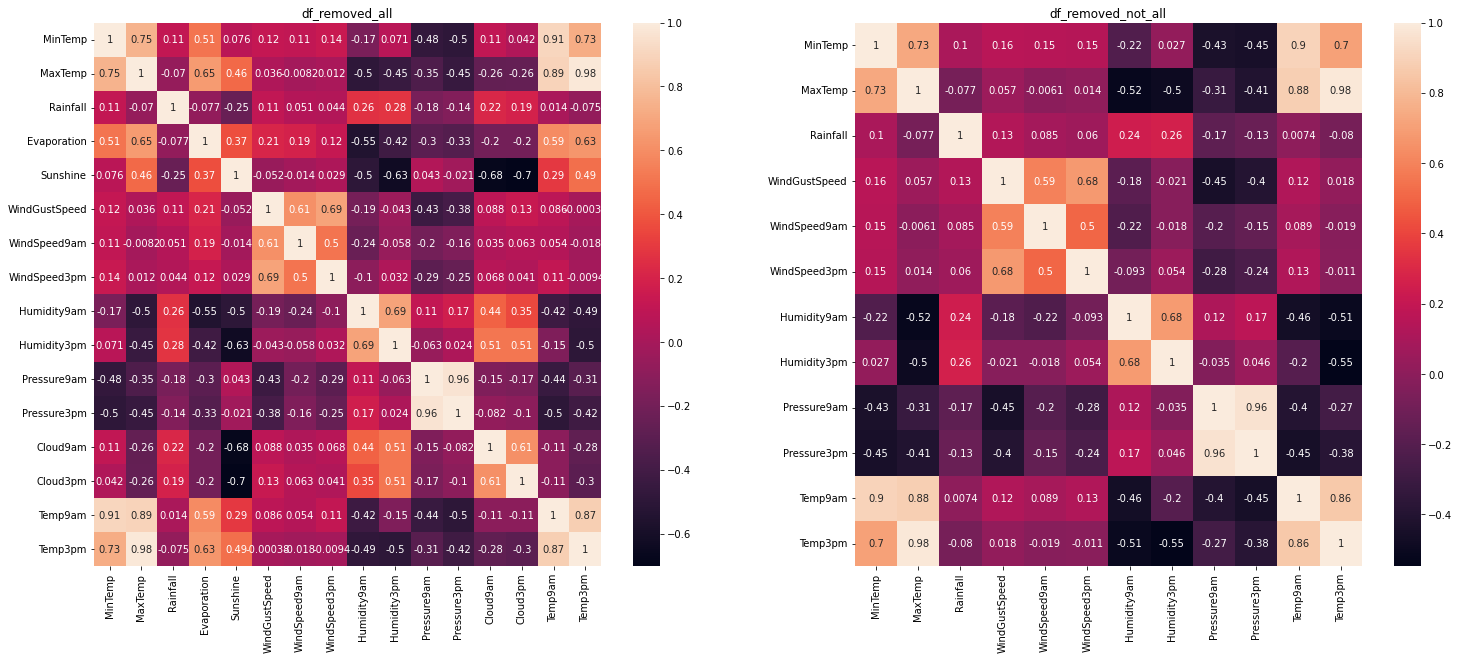

In [17]:
#creating correlation heatmap comparison
fig, ax = plt.subplots(1,2,figsize = (25,10))
sns.heatmap(df_removed_all.corr(),annot = True, ax = ax[0])
sns.heatmap(df_removed_not_all.corr(), annot = True, ax = ax[1])
ax[0].set_title('df_removed_all')
ax[1].set_title('df_removed_not_all')
plt.show();

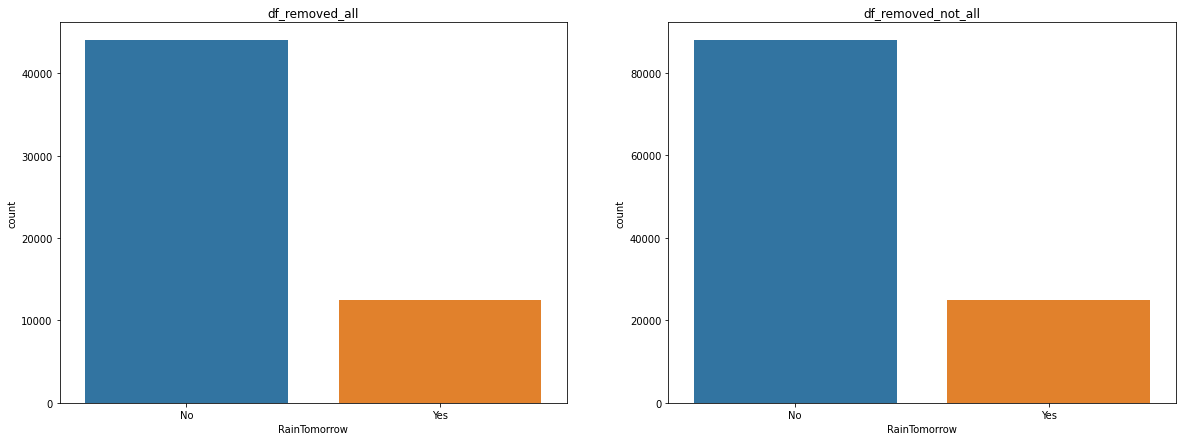

In [18]:
#creating target feature countplots comparison
fig, ax = plt.subplots(1,2,figsize = (20,7))
sns.countplot(df_removed_all.RainTomorrow, ax = ax[0])
sns.countplot(df_removed_not_all.RainTomorrow, ax = ax[1])
ax[0].set_title('df_removed_all')
ax[1].set_title('df_removed_not_all')
plt.show();

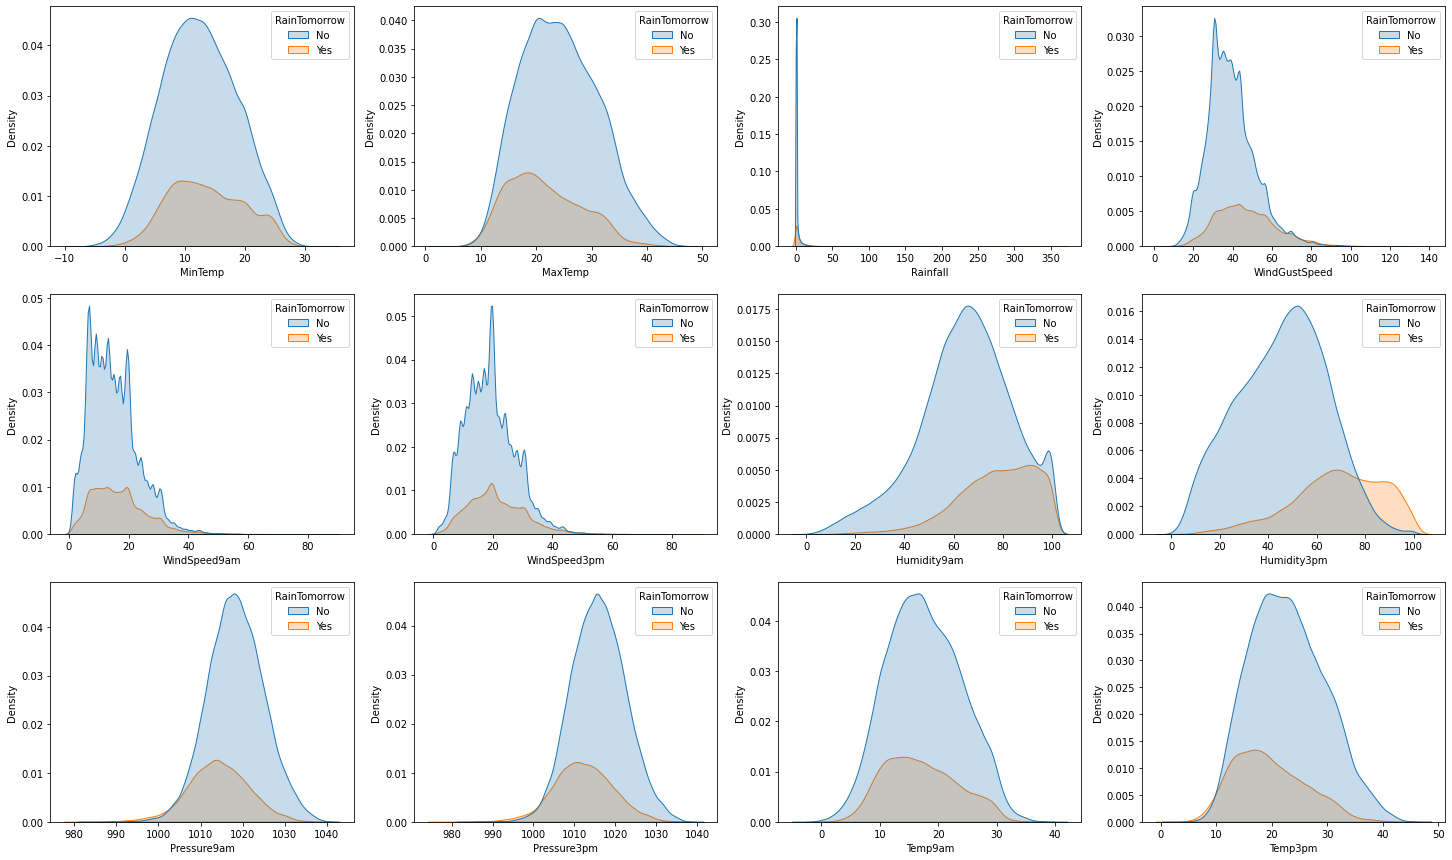

In [19]:
#create a list of column names with numerical values
cols = [i for i in df_removed_not_all.columns if 'Dir' not in i and i not in ['RainToday','RainTomorrow']]
#create matplotlib subplots figure
fig,ax = plt.subplots(3,4,figsize = (25,15))
#create row and column controller for the axes
row = 0
col = 0
#loop through numerical columns
for i in cols:
    #create kdeplot
    sns.kdeplot(df_removed_not_all[i],hue = df_removed_not_all.RainTomorrow, ax = ax[row,col], shade = True)
    #if col value doesnt equal to 3
    if col != 3:
        #add 1 
        col+=1
    #if it does equal to 3
    elif col == 3:
        #reassign 0 as col's value
        col = 0 
        #add 1 to the row 
        row+= 1
    #if row equals to 3
    elif row == 3:
        #stop the looping
        break

#### **Interpretation**
**Correlation Heatmaps**<br>
as what we have known that two approaches are being used to handle missing values for this data. the heatmaps represent two resulting dataframes. the correlations between independent features do not differ significantly. only few getting darker (but still -0.05 the lowest) like temp3pm and humdity3pm the rest are just more or less the similar.<br>
**Count Plots**<br>
this part confirms my previous hypothesis that getting 38% samples will not distrupt the actual distribution. by looking at the the original and after-null-removal state, we can tell that we still get the same amount target feature proportion. though still imbalanced, that is, hehe. <br>
**Kernel Density Estimation Plots**<br>
from comparing the distribution of target features for each predictor feature, we understand that rain or no rain will still get us the same values. so i dont think this data is going to be suitable if it were to be modeled using algorithms that calculate distance or clusters so on and so forth. 

# Model Initiation

In [20]:
#defining an ml model function
def create_model1(data,model):
    
    #defining models
    models = {
        'lr':LogisticRegression(solver='liblinear',random_state = 23),
        'svc':SVC(random_state = 23)
    }
    
    #preprocessing data
    x = data[data.columns[:-1]]
    x.RainToday = [1 if i == 'Yes' else 0 for i in x['RainToday']]
    y = data[data.columns[-1]]
    y = [1 if i == 'Yes' else 0 for i in y]
    objCols = x.dtypes[x.dtypes == object].index
    numCols = x.dtypes[x.dtypes != object].index
    oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
    obj_encoded = oh.fit_transform(x[objCols])
    obj_encoded = pd.DataFrame(obj_encoded,columns = oh.get_feature_names())
    obj_encoded = obj_encoded.set_index(x.index)
    x = pd.concat([x[numCols],obj_encoded],axis = 1)
    
    #splitting dataset
    xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.2,random_state = 23)
    
    #initiating machine learning model
    mod = models[model]
    
    #fitting machine learning model
    mod.fit(xtrain,ytrain)
    
    #evaluating model
    ypred = mod.predict(xtest)
    print(classification_report(ytest,ypred))
    
    #returning objects
    return (xtrain,ytrain,xtest,ytest,ypred,classification_report(ytest,ypred))

## **df_removed_all**

#### ***Logistic Regression***

In [21]:
a,c,d,e,f,cr = create_model1(df_removed_all,'lr')

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8819
           1       0.74      0.54      0.63      2465

    accuracy                           0.86     11284
   macro avg       0.81      0.74      0.77     11284
weighted avg       0.85      0.86      0.85     11284



#### ***Support Vector Classifier***

In [22]:
a,c,d,e,f,cr = create_model1(df_removed_all,'svc')

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      8819
           1       0.83      0.35      0.50      2465

    accuracy                           0.84     11284
   macro avg       0.84      0.67      0.70     11284
weighted avg       0.84      0.84      0.82     11284



## **df_removed_not_all**

#### ***Logistic Regression***

In [23]:
a,c,d,e,f,cr = create_model1(df_removed_not_all,'lr')

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17577
           1       0.74      0.51      0.60      5008

    accuracy                           0.85     22585
   macro avg       0.80      0.73      0.76     22585
weighted avg       0.84      0.85      0.84     22585



#### ***Support Vector Classifier***

In [24]:
a,c,d,e,f,cr = create_model1(df_removed_not_all,'svc')

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     17577
           1       0.80      0.40      0.53      5008

    accuracy                           0.84     22585
   macro avg       0.82      0.68      0.72     22585
weighted avg       0.84      0.84      0.82     22585



### **Interpretaion**
1. from dataframe persepective, df_removed_all (dra) seems to be doing better than df_removed_not_all (drna). i suppose this is probabily due to the columns removal. dra got all the columns staying except 'Location' and 'Date'. drna lost, not just Location and Date, but other features like cloud features and stuff and so on.  
2. from model perspective, Logistic Regression is more favorable than SVC. it's gotten better overall precision, recall and accuracy in the two dataframes. note that this part is not going to finalize which model to use. these models have loads of parameter to tune, and might give different results.

### **Decision**
for model building, i am going to use dra dataset and tune the model on that particular data only.

# Handling Normality

In [25]:
not_normal = df_removed_all.skew()[df_removed_all.skew()>0.1]
not_normal

MaxTemp          0.185014
Rainfall         7.502521
Evaporation      2.232267
WindGustSpeed    0.960215
WindSpeed9am     0.933070
WindSpeed3pm     0.596814
Temp9am          0.111134
Temp3pm          0.195421
dtype: float64

In [26]:
df_removed_all[not_normal.index].describe()

,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,24.219206,2.130397,5.503135,40.877366,15.667228,19.786778,18.204961,22.710333
std,6.970676,7.014822,3.696282,13.335232,8.317005,8.510180,6.567991,6.836543
min,4.100000,0.000000,0.000000,9.000000,2.000000,2.000000,-0.700000,3.700000
25%,18.700000,0.000000,2.800000,31.000000,9.000000,13.000000,13.100000,17.400000
50%,23.900000,0.000000,5.000000,39.000000,15.000000,19.000000,17.800000,22.400000
75%,29.700000,0.600000,7.400000,48.000000,20.000000,26.000000,23.300000,27.900000
max,48.100000,206.200000,81.200000,124.000000,67.000000,76.000000,39.400000,46.100000


In [27]:
neg_pos = [i for i in not_normal.index if 'Temp' in i]
print('Original Skewness')
print('-----------------------------------')
print(df_removed_all[neg_pos].skew(),'\n')
print('Transformation Using Cube Root')
print('-----------------------------------')
print(np.cbrt(df_removed_all[neg_pos]).skew(),'\n')
print('Transfomation Using yeojohnson')
print('-----------------------------------')
for i in neg_pos:
    print(i,pd.DataFrame(stats.yeojohnson(df_removed_all[i])[0])[0].skew())

Original Skewness
-----------------------------------
MaxTemp    0.185014
Temp9am    0.111134
Temp3pm    0.195421
dtype: float64 

Transformation Using Cube Root
-----------------------------------
MaxTemp   -0.193375
Temp9am   -0.617027
Temp3pm   -0.230307
dtype: float64 

Transfomation Using yeojohnson
-----------------------------------
MaxTemp -0.04179094440799486
Temp9am -0.061776478063759896
Temp3pm -0.04083642612004963


In [28]:
pos_zer = [i for i in not_normal.index if 'Temp' not in i]
print('Original Skewness')
print('-----------------------------------')
print(df_removed_all[pos_zer].skew(),'\n')
print('Transformation Using log1p')
print('-----------------------------------')
print(np.log1p(df_removed_all[pos_zer]).skew(),'\n')
print('Transfomation Using boxcox')
print('-----------------------------------')
for i in pos_zer:
    print(i,pd.DataFrame(stats.boxcox(df_removed_all[i]+1)[0])[0].skew())

Original Skewness
-----------------------------------
Rainfall         7.502521
Evaporation      2.232267
WindGustSpeed    0.960215
WindSpeed9am     0.933070
WindSpeed3pm     0.596814
dtype: float64 

Transformation Using log1p
-----------------------------------
Rainfall         2.029261
Evaporation     -0.326969
WindGustSpeed   -0.074374
WindSpeed9am    -0.521256
WindSpeed3pm    -0.686564
dtype: float64 

Transfomation Using boxcox
-----------------------------------
Rainfall 1.0102923413136071
Evaporation -0.0046930355510932074
WindGustSpeed 0.0015763952833031875
WindSpeed9am -0.012831641799151548
WindSpeed3pm -0.011716025197279817


### **Explanation**
1. for normality handling i divided the numerical data into two groups. the first group is going to be features that have possibility to contain negative and the second is otherwise.
2. for the first group i have conducted 2 transformation. the result is yeojohnson transformed the features with the least skewnewss.
3. for the second group, i have also conducted 2 transformation. the result is boxcox as the best transformer reducing most of the skewness

### **Conclusion**
for data containin negatives will be transformed using yeojohnson and the rest with boxcox

# Model Evaluation
### Trying out new transformed dataset

In [29]:
#defining an ml model function
def create_model2(data,model):
    #getting skewed features
    not_normal = df_removed_all.skew()[df_removed_all.skew()>0.1]
    neg_pos = [i for i in not_normal.index if 'Temp' in i]
    pos_zer = [i for i in not_normal.index if 'Temp' not in i]
    
    #defining models
    models = {
        'lr':LogisticRegression(solver='liblinear',random_state = 23),
        'svc':SVC(random_state = 23)
    }
    
    #preprocessing data
    x = data[data.columns[:-1]]
    x.RainToday = [1 if i == 'Yes' else 0 for i in x['RainToday']]
    y = data[data.columns[-1]]
    y = [1 if i == 'Yes' else 0 for i in y]
    objCols = x.dtypes[x.dtypes == object].index
    numCols = x.dtypes[x.dtypes != object].index
    #encoding categoricals
    oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
    obj_encoded = oh.fit_transform(x[objCols])
    obj_encoded = pd.DataFrame(obj_encoded,columns = oh.get_feature_names())
    obj_encoded = obj_encoded.set_index(x.index)
    
    #combining dataframes
    x = pd.concat([x[numCols],obj_encoded],axis = 1)
    
    #splitting dataset
    xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.2,random_state = 23)
    
    #tranforming xtrain numericals
    for i in neg_pos:
        xtrain[i] = stats.yeojohnson(xtrain[i])[0]
    for i in pos_zer:
        xtrain[i] = stats.boxcox(xtrain[i]+1)[0]
        
    #tranforming xtest numericals
    for i in neg_pos:
        xtest[i] = stats.yeojohnson(xtest[i])[0]
    for i in pos_zer:
        xtest[i] = stats.boxcox(xtest[i]+1)[0]
    
    #initiating machine learning model
    mod = models[model]
    
    #fitting machine learning model
    mod.fit(xtrain,ytrain)
    
    #evaluating model
    ypred = mod.predict(xtest)
    print(classification_report(ytest,ypred))
    
    #returning objects
    return (xtrain,ytrain,xtest,ytest,ypred,classification_report(ytest,ypred))

#### ***Logistic Regression***

In [30]:
a,c,d,e,f,cr = create_model2(df_removed_all,'lr')

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      8819
           1       0.55      0.79      0.65      2465

    accuracy                           0.81     11284
   macro avg       0.74      0.81      0.76     11284
weighted avg       0.85      0.81      0.82     11284



#### ***Support Vector Classifier***

In [31]:
a,c,d,e,f,cr = create_model2(df_removed_all,'svc')

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      8819
           1       0.88      0.23      0.36      2465

    accuracy                           0.82     11284
   macro avg       0.85      0.61      0.63     11284
weighted avg       0.83      0.82      0.78     11284



***one thing that caught my attention so far. svc the longest model to run is so poor at correctly predicting next-day rain.*** it can be seen from the recall. it only predicted 23% correctly from all actual rain. in contrast, it's doing really well in terms of having most of it's rain prediction correct. the good thing about this svc model is that when it predicts tomorrow will rain, 88% of the time that particular rain prediction will come out true. but, it's going to miss more 77% rain and classify it as not rain
<br>LogisticRegression in the other hand is the vice versa. predicting 79% correctly from all actual rain but only 55% correct from all its rain prediction. this means that this particular model really messed a lot at predicting rain. it's got half of its rain prediction false. when it predicts tomorrow will rain, 50% of the time rain won't happen the next day. the good thing is it won't miss rain that much as it covered 79% actual rain

***so i guess it's better to have false rain than false not rain, isn't it? so yeah, logistic regression it is***. but let's not jump to conclusions yet and play more with the features and parameters

### Feature scaling

In [32]:
#defining an ml model function
def create_model3(data,model,scaler):
    #getting skewed features
    not_normal = df_removed_all.skew()[df_removed_all.skew()>0.1]
    neg_pos = [i for i in not_normal.index if 'Temp' in i]
    pos_zer = [i for i in not_normal.index if 'Temp' not in i]
    
    #defining models
    models = {
        'lr':LogisticRegression(solver='liblinear',random_state = 23),
        'svc':SVC(random_state = 23)
    }
    
    #defining sclaers
    scalers = {
        'ss':StandardScaler(),
        'mms':MinMaxScaler(),
        'rs':RobustScaler()
    }
    
    #preprocessing data
    x = data[data.columns[:-1]]
    x.RainToday = [1 if i == 'Yes' else 0 for i in x['RainToday']]
    y = data[data.columns[-1]]
    y = [1 if i == 'Yes' else 0 for i in y]
    objCols = x.dtypes[x.dtypes == object].index
    numCols = x.dtypes[x.dtypes != object].index
    #encoding categoricals
    oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
    obj_encoded = oh.fit_transform(x[objCols])
    obj_encoded = pd.DataFrame(obj_encoded,columns = oh.get_feature_names())
    obj_encoded = obj_encoded.set_index(x.index)
    
    #combining dataframes
    x = pd.concat([x[numCols],obj_encoded],axis = 1)
    
    #splitting dataset
    xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.2,random_state = 23)
    
    #tranforming xtrain numericals
    for i in neg_pos:
        xtrain[i] = stats.yeojohnson(xtrain[i])[0]
    for i in pos_zer:
        xtrain[i] = stats.boxcox(xtrain[i]+1)[0]
        
    #tranforming xtest numericals
    for i in neg_pos:
        xtest[i] = stats.yeojohnson(xtest[i])[0]
    for i in pos_zer:
        xtest[i] = stats.boxcox(xtest[i]+1)[0]
        
    #scaling
    scaler = scalers[scaler]
    xtrain[xtrain.columns] = scaler.fit_transform(xtrain)
    xtest[xtest.columns] = scaler.transform(xtest)
    
    #initiating machine learning model
    mod = models[model]
    
    #fitting machine learning model
    mod.fit(xtrain,ytrain)
    
    #evaluating model
    ypred = mod.predict(xtest)
    print(classification_report(ytest,ypred))
    
    #returning objects
    return (xtrain,ytrain,xtest,ytest,ypred,classification_report(ytest,ypred))

#### ***Logistic Regression with scaled dataset***

In [33]:
for i in ['ss','mms','rs']:
    print(i)
    a,c,d,e,f,cr = create_model3(df_removed_all,'lr',i)
    print('\n')

ss
              precision    recall  f1-score   support

           0       0.93      0.85      0.88      8819
           1       0.58      0.76      0.66      2465

    accuracy                           0.83     11284
   macro avg       0.75      0.80      0.77     11284
weighted avg       0.85      0.83      0.84     11284



mms
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      8819
           1       0.58      0.75      0.66      2465

    accuracy                           0.83     11284
   macro avg       0.75      0.80      0.77     11284
weighted avg       0.85      0.83      0.84     11284



rs
              precision    recall  f1-score   support

           0       0.93      0.85      0.88      8819
           1       0.58      0.76      0.66      2465

    accuracy                           0.83     11284
   macro avg       0.75      0.80      0.77     11284
weighted avg       0.85      0.83      0.84     11284





#### ***Support Vector Classifier with scaled data***

In [34]:
for i in ['ss','mms','rs']:
    print(i)
    a,c,d,e,f,cr = create_model3(df_removed_all,'svc',i)
    print('\n')

ss
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      8819
           1       0.64      0.70      0.67      2465

    accuracy                           0.85     11284
   macro avg       0.78      0.80      0.79     11284
weighted avg       0.86      0.85      0.85     11284



mms
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      8819
           1       0.66      0.65      0.66      2465

    accuracy                           0.85     11284
   macro avg       0.78      0.78      0.78     11284
weighted avg       0.85      0.85      0.85     11284



rs
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      8819
           1       0.64      0.72      0.68      2465

    accuracy                           0.85     11284
   macro avg       0.78      0.80      0.79     11284
weighted avg       0.86      0.85      0.85     11284





#### **Interpretation**
1. for logistic regression. scaling dataasets surely gives different results, but insignificantly from the non-scaled one. between the scalers, i would select either StandardScaler or RobustScaler. that is because their metrics are more or less similar if not same. and MinMaxScaler's fall below those two.
2. for SVC, RobustScaler seems promising. we can see that it covers 72% of the raining days. note that we like more false rain than false not rain, this scaler is our best choice yet so far. 
3. using scaled values for this particaular dataset is more favorable. the reason is that non-scaled data metrics surely covers more raining days than the scaled one. but what we want here is how we get a balanced precision and recall for our raining days. the difference between recall and precision for non-scaled data is too big roughly more than 10 if not 50. in the other hand scaled ones gave us less difference, more or less 10. 

## Model Tuning Logistic Regression

In [35]:
#defining data preprocessing function
def preprocess(data,scaler):
    #getting skewed features
    not_normal = df_removed_all.skew()[df_removed_all.skew()>0.1]
    neg_pos = [i for i in not_normal.index if 'Temp' in i]
    pos_zer = [i for i in not_normal.index if 'Temp' not in i]
    
    #defining sclaers
    scalers = {
        'ss':StandardScaler(),
        'mms':MinMaxScaler(),
        'rs':RobustScaler()
    }
    
    #preprocessing data
    x = data[data.columns[:-1]]
    x.RainToday = [1 if i == 'Yes' else 0 for i in x['RainToday']]
    y = data[data.columns[-1]]
    y = [1 if i == 'Yes' else 0 for i in y]
    objCols = x.dtypes[x.dtypes == object].index
    numCols = x.dtypes[x.dtypes != object].index
    #encoding categoricals
    oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
    obj_encoded = oh.fit_transform(x[objCols])
    obj_encoded = pd.DataFrame(obj_encoded,columns = oh.get_feature_names())
    obj_encoded = obj_encoded.set_index(x.index)
    
    #combining dataframes
    x = pd.concat([x[numCols],obj_encoded],axis = 1)
    
    #splitting dataset
    xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.2,random_state = 23)
    
    #tranforming xtrain numericals
    for i in neg_pos:
        xtrain[i] = stats.yeojohnson(xtrain[i])[0]
    for i in pos_zer:
        xtrain[i] = stats.boxcox(xtrain[i]+1)[0]
        
    #tranforming xtest numericals
    for i in neg_pos:
        xtest[i] = stats.yeojohnson(xtest[i])[0]
    for i in pos_zer:
        xtest[i] = stats.boxcox(xtest[i]+1)[0]
        
    #scaling
    scaler = scalers[scaler]
    xtrain[xtrain.columns] = scaler.fit_transform(xtrain)
    xtest[xtest.columns] = scaler.transform(xtest)
    
    #combinin feature and target
    xtrain['RainTomorrow'] = ytrain
    train = xtrain
    xtest['RainTomorrow'] = ytest
    test = xtest
    
    #returning objects
    return (train,test)

In [67]:
def gridSearch(model):
    
    #defining models
    models = {
        'lr':LogisticRegression(random_state = 23),
        'svc':SVC(random_state = 23)
    }
    
    #creating grid parameters
    parameters_lr = {
        'solver':['saga','sag','newton-cg','liblinear'],
        'penalty':['l2','l1','none','elasticnet']
    }
    parameters_svc = {
        'kernel': ['poly','sigmoid'],
        'gamma':['scale','auto']
    }
    #preprocessing dataset
    train,test = preprocess(df_removed_all,'ss')
    #combining train and test set for splitting
    df = pd.concat([train,test],axis = 0)
    #creating predefined split
    split_index = [-1 if i in train.index else 0 for i in df.index]
    ps = PredefinedSplit(test_fold = split_index)
    #initiating model bvvvvcvbq
    mod = models[model]
    #initiating GridSearchCV
    if model == 'lr':
        clf = GridSearchCV(estimator = mod,param_grid = parameters_lr, cv = ps, scoring = 'recall', n_jobs = -1)
    else:
        clf = GridSearchCV(estimator = mod,param_grid = parameters_svc, cv = ps, scoring = 'recall', n_jobs = -1)
    #seperating x and y variables
    x = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    #fitting model
    clf.fit(x,y)
    #returning model
    return clf

#### ***Logistic Regression***

In [68]:
gs_lr = gridSearch('lr')
pd.DataFrame(gs_lr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_solver,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,1.346836,0.0,0.012301,0.0,l2,saga,"{'penalty': 'l2', 'solver': 'saga'}",0.759026,0.759026,0.0,4
1,2.633568,0.0,0.021904,0.0,l2,sag,"{'penalty': 'l2', 'solver': 'sag'}",0.759026,0.759026,0.0,4
2,1.918390,0.0,0.011273,0.0,l2,newton-cg,"{'penalty': 'l2', 'solver': 'newton-cg'}",0.759026,0.759026,0.0,4
3,1.892223,0.0,0.014274,0.0,l2,liblinear,"{'penalty': 'l2', 'solver': 'liblinear'}",0.759026,0.759026,0.0,4
4,3.430186,0.0,0.010547,0.0,l1,saga,"{'penalty': 'l1', 'solver': 'saga'}",0.758621,0.758621,0.0,8
5,0.033751,0.0,0.000000,0.0,l1,sag,"{'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,NaN,10
6,0.028033,0.0,0.000000,0.0,l1,newton-cg,"{'penalty': 'l1', 'solver': 'newton-cg'}",NaN,NaN,NaN,11
7,4.011198,0.0,0.007837,0.0,l1,liblinear,"{'penalty': 'l1', 'solver': 'liblinear'}",0.758621,0.758621,0.0,8
8,1.597409,0.0,0.013564,0.0,none,saga,"{'penalty': 'none', 'solver': 'saga'}",0.759432,0.759432,0.0,1
9,2.090736,0.0,0.012692,0.0,none,sag,"{'penalty': 'none', 'solver': 'sag'}",0.759432,0.759432,0.0,1


#### ***Support Vector Classifier***

In [66]:
gs_svc = gridSearch('svc')
pd.DataFrame(gs_svc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_kernel,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,285.538242,0.0,14.665158,0.0,scale,poly,"{'gamma': 'scale', 'kernel': 'poly'}",0.658418,0.658418,0.0,1
1,194.598874,0.0,18.153361,0.0,scale,sigmoid,"{'gamma': 'scale', 'kernel': 'sigmoid'}",0.642191,0.642191,0.0,3
2,284.530300,0.0,14.825755,0.0,auto,poly,"{'gamma': 'auto', 'kernel': 'poly'}",0.658418,0.658418,0.0,1
3,195.286027,0.0,18.231423,0.0,auto,sigmoid,"{'gamma': 'auto', 'kernel': 'sigmoid'}",0.642191,0.642191,0.0,3


#### ***Interpretation***
considering we want this model to cover as much as raining days as possible, that means we want our recall to be as high as we can get. from the two models, LogisiticRegression gave us higher recall. if we were to use LogisticRegression, we will cover around 78% of the raining days. for the same case we will get 64% coverage of the raining days using SVC.

#### ***best paramters of two models are as follows***

In [69]:
gs_lr.best_params_

{'penalty': 'none', 'solver': 'saga'}

In [70]:
gs_svc.best_params_

{'gamma': 'scale', 'kernel': 'poly'}

# Model Selection

In [64]:
#defining an ml model function
def create_final_model(data,model,scaler):
    #getting skewed features
    not_normal = df_removed_all.skew()[df_removed_all.skew()>0.1]
    neg_pos = [i for i in not_normal.index if 'Temp' in i]
    pos_zer = [i for i in not_normal.index if 'Temp' not in i]
    
    #defining models
    models = {
        'lr':LogisticRegression(solver='saga',random_state = 23,penalty = 'none'),
        'svc':SVC(random_state = 23, gamma = 'scale',kernel = 'poly')
    }
    
    #defining sclaers
    scalers = {
        'ss':StandardScaler(),
        'mms':MinMaxScaler(),
        'rs':RobustScaler()
    }
    
    #preprocessing data
    x = data[data.columns[:-1]]
    x.RainToday = [1 if i == 'Yes' else 0 for i in x['RainToday']]
    y = data[data.columns[-1]]
    y = [1 if i == 'Yes' else 0 for i in y]
    objCols = x.dtypes[x.dtypes == object].index
    numCols = x.dtypes[x.dtypes != object].index
    #encoding categoricals
    oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
    obj_encoded = oh.fit_transform(x[objCols])
    obj_encoded = pd.DataFrame(obj_encoded,columns = oh.get_feature_names())
    obj_encoded = obj_encoded.set_index(x.index)
    
    #combining dataframes
    x = pd.concat([x[numCols],obj_encoded],axis = 1)
    
    #splitting dataset
    xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.2,random_state = 23)
    
    #tranforming xtrain numericals
    for i in neg_pos:
        xtrain[i] = stats.yeojohnson(xtrain[i])[0]
    for i in pos_zer:
        xtrain[i] = stats.boxcox(xtrain[i]+1)[0]
        
    #tranforming xtest numericals
    for i in neg_pos:
        xtest[i] = stats.yeojohnson(xtest[i])[0]
    for i in pos_zer:
        xtest[i] = stats.boxcox(xtest[i]+1)[0]
        
    #scaling
    scaler = scalers[scaler]
    xtrain[xtrain.columns] = scaler.fit_transform(xtrain)
    xtest[xtest.columns] = scaler.transform(xtest)
    
    #initiating machine learning model
    mod = models[model]
    
    #fitting machine learning model
    mod.fit(xtrain,ytrain)
    
    #evaluating model
    ypred = mod.predict(xtest)
    print(classification_report(ytest,ypred))
    
    #returning objects
    return ({'xtrain':xtrain,'ytrain':ytrain,'xtest':xtest,'ytest':ytest,'ypred':ypred},classification_report(ytest,ypred),mod)

#### ***Logistic Regression***

In [71]:
lr_datasets,lr_cr,lr_clf = create_final_model(df_removed_all,'lr','ss')

              precision    recall  f1-score   support

           0       0.93      0.85      0.88      8819
           1       0.58      0.76      0.66      2465

    accuracy                           0.83     11284
   macro avg       0.75      0.80      0.77     11284
weighted avg       0.85      0.83      0.84     11284



#### ***Support Vector Classifier***

In [43]:
svc_datasets,svc_cr,svc_clf = create_final_model(df_removed_all,'svc','rs')

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      8819
           1       0.64      0.68      0.66      2465

    accuracy                           0.85     11284
   macro avg       0.78      0.79      0.78     11284
weighted avg       0.85      0.85      0.85     11284



***as previous gridSearch explanation concerned, we are going to select LogisticRegression for the final model as it has the highest recall***

### Creating Pipeline

In [74]:
#defining normalizer function
def normalize(df):
    #defining normalizers
    techniques = {
        'bxcx':stats.boxcox,
        'yjs':stats.yeojohnson
    }
    #getting skewed features
    not_normal = df.skew()[df.skew()>0.1]
    neg_pos = [i for i in not_normal.index if 'Temp' in i]
    pos_zer = [i for i in not_normal.index if 'Temp' not in i]
    
    #transforming values
    for i in neg_pos:
        df[i]= techniques['yjs'](df[i])[0]
    for i in pos_zer:
        df[i]= techniques['bxcx'](df[i]+1)[0]
    #returning dataframes
    return df

#defining model
def model(df):
    #defining label and onehot columns
    _2Classes = ['RainTomorrow']
    _m2Classes = [i for i in df.dtypes[df.dtypes == object].index if i not in _2Classes]
    #defining x and y variabels
    x = df[df.columns[:-1]]
    x.RainToday = [1 if i == 'Yes' else 0 for i in x.RainToday]
    y = df[df.columns[-1]]
    y = [1 if i == 'Yes' else 0 for i in y]
    #creating column transformer
    ct = make_column_transformer(
        (OneHotEncoder(sparse = False,handle_unknown = 'ignore'),_m2Classes),
        remainder = 'passthrough'
        )
    #creating pipeline
    pipe = Pipeline([
        ('ct',ct),
        ('ss',StandardScaler()),
        ('lr',LogisticRegression(solver='saga',random_state = 23,penalty = 'none'))
    ])
    #splitting dataset
    xtrain,xtest,ytrain,ytest = tts(x,y,test_size = .2,random_state = 23)
    #normalizing values
    xtrain = normalize(xtrain)
    xtest = normalize(xtest)
    #fitting model pipeline
    pipe.fit(xtrain,ytrain)
    #creating classification report
    print(classification_report(ytest,pipe.predict(xtest)))
    #returning datasets and pipline object
    return (xtrain,xtest,ytrain,ytest,pipe)

In [75]:
xtrain,xtest,ytrain,ytest,pipe = model(df_removed_all)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      8819
           1       0.48      0.86      0.62      2465

    accuracy                           0.76     11284
   macro avg       0.71      0.80      0.72     11284
weighted avg       0.85      0.76      0.78     11284



# Model Inference

In [76]:
sample = pd.DataFrame(df_removed_all.sample(1))
sample

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
31830,12.6,21.8,0.0,5.4,8.7,S,39.0,WNW,SSE,17.0,...,66.0,51.0,1025.0,1022.4,7.0,1.0,16.4,21.0,No,No


In [78]:
warnings.filterwarnings("ignore", category=FutureWarning)
prediction = pipe.predict(sample)[0]
if prediction == 1:
    print('Tomorrow Will Rain')
else:
    print('Tomorrow Will Not Rain')

Tomorrow Will Rain


***prediction says tomorrow will rain. interpreting from the model report, there's 52% chance tomorrow won't rain. but don't worry! even if we are going to make many wrong rain predictions, at the end we are going to cover 86% from the actual raining days.***